In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\Preeti Khamkar\OneDrive\Desktop\AIDS Lab\weatherHistory.csv')

In [3]:
df.shape

(96453, 12)

# **Experiment - 01**

In [4]:
df = df.drop(range(86200), axis=0)

In [5]:
df = df.reset_index()

In [6]:
df.isna().sum()

index                       0
Formatted_Date              0
Summary                     0
Precip_Type               374
Temperature (C)             0
Apparent_Temperature_C      0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10253 entries, 0 to 10252
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   10253 non-null  int64  
 1   Formatted_Date          10253 non-null  object 
 2   Summary                 10253 non-null  object 
 3   Precip_Type             9879 non-null   object 
 4   Temperature (C)         10253 non-null  float64
 5   Apparent_Temperature_C  10253 non-null  float64
 6   Humidity                10253 non-null  float64
 7   Wind Speed (km/h)       10253 non-null  float64
 8   Wind Bearing (degrees)  10253 non-null  int64  
 9   Visibility (km)         10253 non-null  float64
 10  Loud Cover              10253 non-null  int64  
 11  Pressure (millibars)    10253 non-null  float64
 12  Daily Summary           10253 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 1.0+ MB


In [8]:
df.head()

,index,Formatted_Date,Summary,Precip_Type,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,86200,2015-11-09 20:00:00.000 +0100,Mostly Cloudy,rain,14.811111,14.811111,0.79,20.7851,300,8.1305,0,1022.57,Foggy until morning.
1,86201,2015-11-09 21:00:00.000 +0100,Mostly Cloudy,rain,15.188889,15.188889,0.73,20.7690,310,11.9784,0,1023.05,Foggy until morning.
2,86202,2015-11-09 22:00:00.000 +0100,Mostly Cloudy,rain,14.494444,14.494444,0.78,15.6009,307,11.6886,0,1023.30,Foggy until morning.
3,86203,2015-11-09 23:00:00.000 +0100,Mostly Cloudy,rain,13.750000,13.750000,0.81,11.5115,299,12.2199,0,1023.13,Foggy until morning.
4,86204,2015-10-01 00:00:00.000 +0200,Mostly Cloudy,rain,8.894444,6.327778,0.74,16.9533,21,16.1000,0,1030.56,Partly cloudy throughout the day.


In [9]:
df.tail()

,index,Formatted_Date,Summary,Precip_Type,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
10248,96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
10249,96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
10250,96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
10251,96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.
10252,96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39,15.5204,0,1016.16,Partly cloudy starting in the morning.


In [10]:
df.describe(include = object)

,Formatted_Date,Summary,Precip_Type,Daily Summary
count,10253,10253,9879,10253
unique,10253,14,2,59
top,2015-11-09 20:00:00.000 +0100,Mostly Cloudy,rain,Mostly cloudy throughout the day.
freq,1,3801,9184,3311


In [11]:
df = df.drop(['index', 'Loud Cover'] , axis = 1)

**Missing Values**

In [12]:
# from sklearn.impute import SimpleImputer
# column_name = 'Precip Type'
# imputer = SimpleImputer(strategy='most_frequent')
# # Fit and transform the column with missing values
# df[column_name] = imputer.fit_transform(df[[column_name]])

df.dropna()

,Formatted_Date,Summary,Precip_Type,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2015-11-09 20:00:00.000 +0100,Mostly Cloudy,rain,14.811111,14.811111,0.79,20.7851,300,8.1305,1022.57,Foggy until morning.
1,2015-11-09 21:00:00.000 +0100,Mostly Cloudy,rain,15.188889,15.188889,0.73,20.7690,310,11.9784,1023.05,Foggy until morning.
2,2015-11-09 22:00:00.000 +0100,Mostly Cloudy,rain,14.494444,14.494444,0.78,15.6009,307,11.6886,1023.30,Foggy until morning.
3,2015-11-09 23:00:00.000 +0100,Mostly Cloudy,rain,13.750000,13.750000,0.81,11.5115,299,12.2199,1023.13,Foggy until morning.
4,2015-10-01 00:00:00.000 +0200,Mostly Cloudy,rain,8.894444,6.327778,0.74,16.9533,21,16.1000,1030.56,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
10248,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
10249,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
10250,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.
10251,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95,Partly cloudy starting in the morning.


In [13]:
df.isna().sum()

Formatted_Date              0
Summary                     0
Precip_Type               374
Temperature (C)             0
Apparent_Temperature_C      0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [14]:
df.shape

(10253, 11)

In [15]:
# categorical_columns = ['Summary', 'Precip_Type', 'Daily Summary']

# # Use get_dummies to one-hot encode the categorical columns
# df = pd.get_dummies(df, columns=categorical_columns)

# # If you want to drop the original categorical columns after one-hot encoding
# df = df.drop(categorical_columns, axis=1)

# # Display the updated DataFrame
# print(df.head())

In [16]:
# df = df.drop_duplicates()

# # If you want to reset the index after dropping duplicates
# df = df.reset_index(drop=True)

# # Display the updated DataFrame
# print(df.head())

# **Standardization**

In [17]:
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# # Assuming your DataFrame is named df and you want to standardize specific columns
# columns_to_standardize = ['Temperature (C)', 'Apparent_Temperature_C',
#                           'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
#                           'Visibility (km)', 'Pressure (millibars)']

# # Create a StandardScaler instance
# scaler = StandardScaler()

# # Fit and transform the specified columns
# df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# # Display the updated DataFrame
# print(df.head())


# **Normalization**

In [18]:
# from sklearn.preprocessing import MinMaxScaler
# import pandas as pd

# # Assuming your DataFrame is named df and you want to normalize specific columns
# columns_to_normalize = ['Temperature (C)', 'Apparent_Temperature_C', 'Humidity',
#                         'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
#                         'Pressure (millibars)']

# # Create a MinMaxScaler instance
# scaler = MinMaxScaler()

# # Fit and transform the specified columns
# df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [19]:
df

,Formatted_Date,Summary,Precip_Type,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2015-11-09 20:00:00.000 +0100,Mostly Cloudy,rain,14.811111,14.811111,0.79,20.7851,300,8.1305,1022.57,Foggy until morning.
1,2015-11-09 21:00:00.000 +0100,Mostly Cloudy,rain,15.188889,15.188889,0.73,20.7690,310,11.9784,1023.05,Foggy until morning.
2,2015-11-09 22:00:00.000 +0100,Mostly Cloudy,rain,14.494444,14.494444,0.78,15.6009,307,11.6886,1023.30,Foggy until morning.
3,2015-11-09 23:00:00.000 +0100,Mostly Cloudy,rain,13.750000,13.750000,0.81,11.5115,299,12.2199,1023.13,Foggy until morning.
4,2015-10-01 00:00:00.000 +0200,Mostly Cloudy,rain,8.894444,6.327778,0.74,16.9533,21,16.1000,1030.56,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
10248,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
10249,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
10250,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.
10251,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95,Partly cloudy starting in the morning.


In [20]:
# url = 'https://drive.google.com/file/d/1XfgRAjrM5TaY4-9zUF7gSLG9Mo_osG0x/view?usp=sharing'
# data = pd.read_csv(url)

In [21]:
# pd.crosstab(index=df['Humidity'] , columns = df[''] , margins = True)

# **EXPERIMENT 2**

In [22]:
df = pd.DataFrame(df)

<BarContainer object of 100 artists>

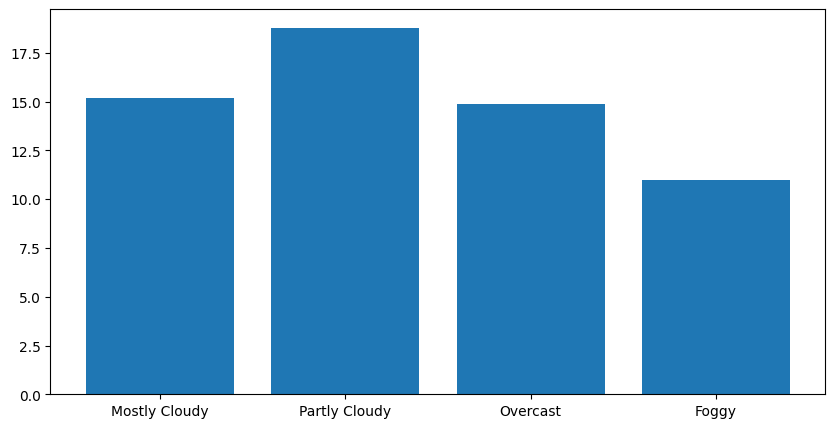

In [23]:
# Bar Graph
y = df['Temperature (C)']
x = df['Summary']
plt.figure(figsize = (10, 5))
plt.bar(x[0:100],y[0:100])


In [24]:
# Contingency Table
pd.crosstab(index=df['Precip_Type'] , columns = df['Humidity'] , margins = True)

Humidity,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,...,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0,All
Precip_Type,,,,,,,,,,,,,,,,,,,,,
rain,1,5,2,6,11,23,20,33,37,50,...,235,550,146,130,357,78,28,159,326,9184
snow,0,0,0,0,0,0,0,0,0,0,...,72,63,42,68,71,6,2,13,57,695
All,1,5,2,6,11,23,20,33,37,50,...,307,613,188,198,428,84,30,172,383,9879


In [25]:
# Scatter Plot
# plt.scatter(df['Precip_Type'],df['Summary'] )

<Axes: ylabel='Temperature (C)'>

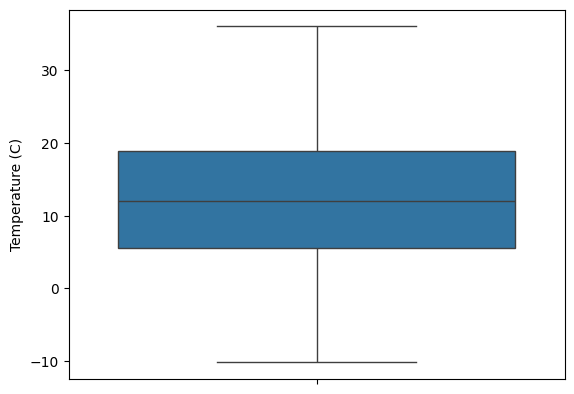

In [26]:
# BoxPlot
sns.boxplot(y)

<Axes: xlabel='Humidity', ylabel='Precip_Type'>

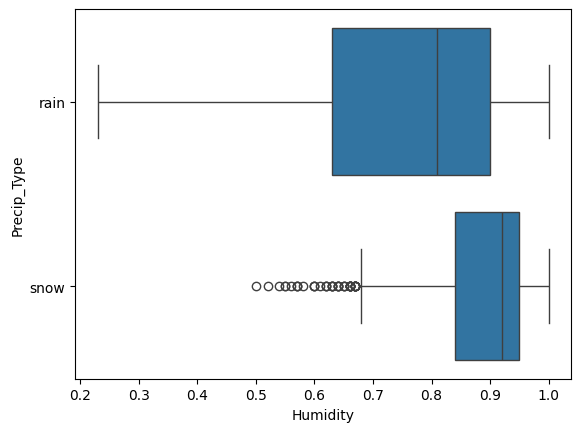

In [27]:
sns.boxplot(x = df['Humidity'], y = df['Precip_Type'], data = df)

In [28]:
# sns.set(rc={'figure.figsize':(10,7)})
# sns.heatmap(df.corr(), annot = True, cmap = 'tab20')
# plt.show()

<Axes: xlabel='Humidity', ylabel='Count'>

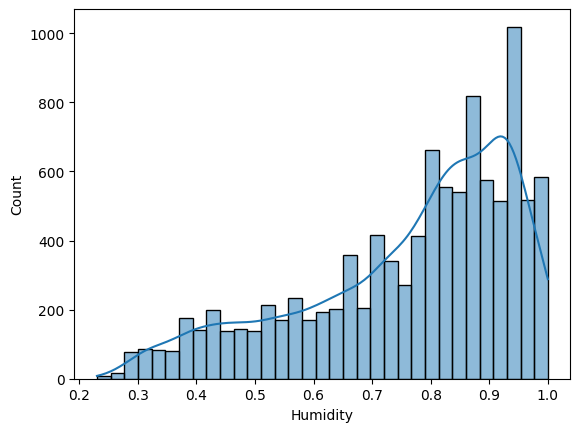

In [29]:
sns.histplot(df['Humidity'], kde=True)

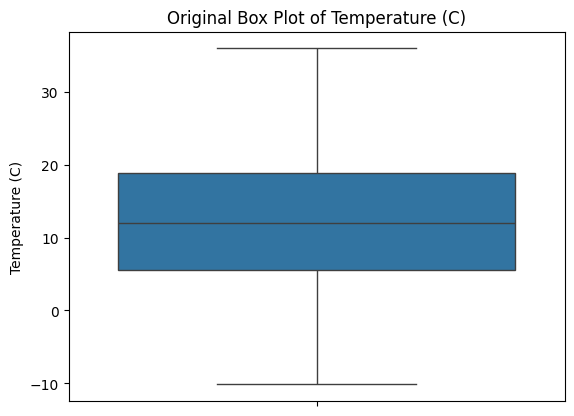

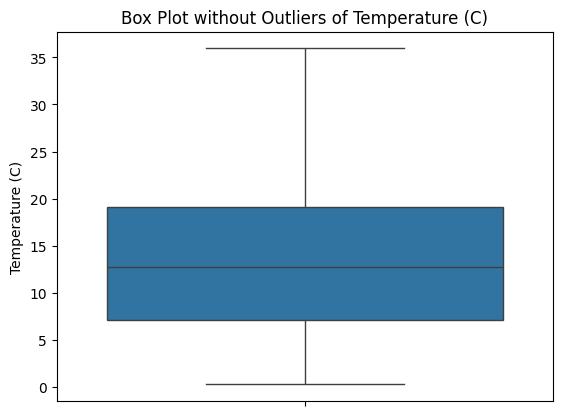

In [30]:
def removal_box_plot(df, column, min_threshold, max_threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] >= min_threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


min_threshold = 0.3
max_threshold = 1
no_outliers = removal_box_plot(df, 'Temperature (C)',  min_threshold,  max_threshold)

# **EXPERIMENT-03**

In [31]:
# x_train , x_test = train_test_split(df , test_size = 0.2 , random_state = 42 , shuffle =True)

In [32]:
# y_test = x_test['Temperature (C)']
# y_train = x_train['Temperature (C)']

In [33]:
# x_train.shape , y_train.shape , x_test.shape , y_test.shape

In [34]:
# y_train.value_counts()

In [35]:
# sns.histplot(df['Humidity'], kde=True)
# sns.histplot(x_train['Humidity'], kde=True)
# sns.histplot(x_test['Humidity'], kde=True)


In [36]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming train_df and test_df are your training and testing dataframes
# # Plotting example data
# train_df = pd.DataFrame({'A': [10, 20, 30, 40, 50], 'B': [5, 15, 25, 35, 45]})
# test_df = pd.DataFrame({'A': [15, 25, 35, 45, 55], 'B': [8, 18, 28, 38, 48]})

# # Bar plot for each column
# plt.figure(figsize=(10, 5))
# index = train_df.columns
# bar_width = 0.35
# opacity = 0.8

# train_bars = plt.bar(2*index, train_df.mean(), bar_width, alpha=opacity, color='b', label='Train')
# test_bars = plt.bar(index, test_df.mean(), bar_width, alpha=opacity, color='r', label='Test')

# plt.xlabel('Columns')
# plt.ylabel('Mean Values')
# plt.title('Comparison between Train and Test Dataframes')
# plt.xticks(index , index)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [37]:
# import matplotlib.pyplot as plt
# train_length = len(x_train)
# test_length = len(x_test)
# plt.figure(figsize=(8, 5))
# plt.bar(['Train', 'Test'], [train_length, test_length], color=['blue', 'red'])
# plt.xlabel('Dataframe')
# plt.ylabel('Length')
# plt.title('Difference of Lengths between Train and Test Dataframes')
# plt.show()

In [38]:
# print("Number of records in Train dataset :" , x_train.shape[0])
# print("Number of records in Test dataset :" , x_test.shape[0])

In [39]:
# from statsmodels.stats.weightstats import ztest as ztest
# ztest(y_train , y_test ,value=0)

In [40]:
# def results(p):
#   if(p['p_value']<0.05):p['hypothesis_accepted']='alternative'
#   if(p['p_value']>=0.05):p['hypothesis_accepted']='null'

#   df=pd.DataFrame(p,index=[''])
#   cols=['value1', 'value2','score','p_value','hypothesis_accepted']
#   return df[cols]

# p={}
# p['value1'],p['value2']=y_train.mean(),y_test.mean()
# p['score'],p['p_value']=ztest(y_train,y_test,alternative='two-sided')
# results(p)

In [41]:
# import pandas as pd

# def results(p):
#     print("Mean of value1 in Train:", p['value1'])
#     print("Mean of value2 in Test:", p['value2'])
#     print("Z-score:", p['score'])
#     print("P-value:", p['p_value'])

# p = {}
# p['value1'], p['value2'] = y_train.mean(), y_test.mean()
# p['score'], p['p_value'] = ztest(y_train, y_test, alternative='two-sided')
# results(p)


In [42]:
# from statsmodels.stats.weightstats import ztest

# # Assuming df1 and df2 are your two dataframes with the same columns
# # For demonstration, let's create sample dataframes
# df1 = x_train['Humidity']
# df2 = x_test['Humidity']

# # Perform two-sample z-test for each column
# z_test_results = {}
# for column in df1.columns:
#   z_statistic, p_value = ztest(df1[column], df2[column])
#   z_test_results[column] = {'z_statistic': z_statistic , 'p_value': p_value}
# # Display the results
# for column, result in z_test_results.items():
#   print(f"Column '{column}'Z-statistic = {result['z_statistic']}, p-value = {result['p_value']}")

# **EXPERIMENT-04**

## **Pearson Correlation**

In [43]:
pearsoncorr = df.corr(method='pearson', numeric_only=True)
pearsoncorr

,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.994333,-0.657914,-0.006209,0.037990,0.470117,-0.054451
Apparent_Temperature_C,0.994333,1.000000,-0.631709,-0.049024,0.039402,0.460022,-0.054223
Humidity,-0.657914,-0.631709,1.000000,-0.195171,0.001123,-0.500741,0.011775
Wind Speed (km/h),-0.006209,-0.049024,-0.195171,1.000000,0.061212,0.040044,-0.028121
Wind Bearing (degrees),0.037990,0.039402,0.001123,0.061212,1.000000,0.018904,0.032640
Visibility (km),0.470117,0.460022,-0.500741,0.040044,0.018904,1.000000,0.093260
Pressure (millibars),-0.054451,-0.054223,0.011775,-0.028121,0.032640,0.093260,1.000000


<Axes: >

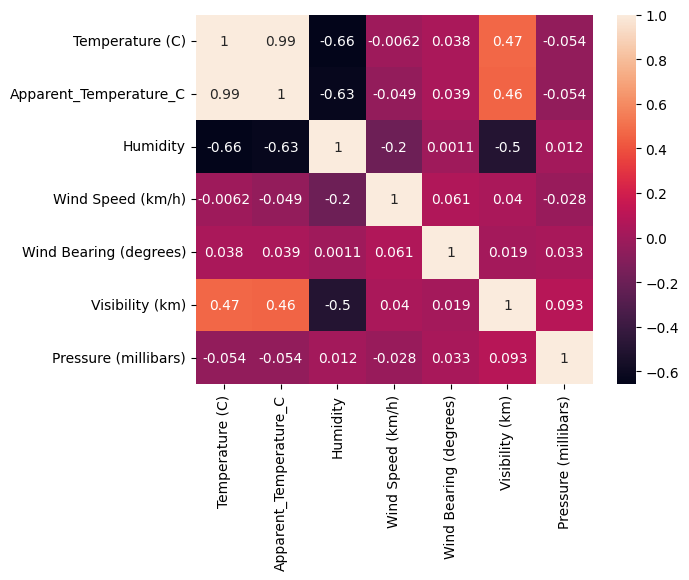

In [44]:
sns.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns, annot=True)

## **Spearman's Rank Correlation**

In [45]:
spearmancorr = df.corr(numeric_only=True, method='spearman')
spearmancorr

,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.997052,-0.593269,-0.028770,0.036920,0.516882,-0.306031
Apparent_Temperature_C,0.997052,1.000000,-0.581608,-0.069654,0.035942,0.509617,-0.294599
Humidity,-0.593269,-0.581608,1.000000,-0.228910,0.007949,-0.582933,0.051703
Wind Speed (km/h),-0.028770,-0.069654,-0.228910,1.000000,0.065931,0.012937,-0.145203
Wind Bearing (degrees),0.036920,0.035942,0.007949,0.065931,1.000000,0.017655,-0.095375
Visibility (km),0.516882,0.509617,-0.582933,0.012937,0.017655,1.000000,-0.134652
Pressure (millibars),-0.306031,-0.294599,0.051703,-0.145203,-0.095375,-0.134652,1.000000


## **Kendall Rank Correlation**

In [46]:
kendallcorr = df.corr(numeric_only=True, method='kendall')
kendallcorr

,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.968978,-0.428952,-0.015253,0.024639,0.364573,-0.208614
Apparent_Temperature_C,0.968978,1.000000,-0.416567,-0.044836,0.024072,0.358089,-0.201482
Humidity,-0.428952,-0.416567,1.000000,-0.159777,0.007775,-0.427672,0.039144
Wind Speed (km/h),-0.015253,-0.044836,-0.159777,1.000000,0.045747,0.011840,-0.097851
Wind Bearing (degrees),0.024639,0.024072,0.007775,0.045747,1.000000,0.015795,-0.062619
Visibility (km),0.364573,0.358089,-0.427672,0.011840,0.015795,1.000000,-0.097489
Pressure (millibars),-0.208614,-0.201482,0.039144,-0.097851,-0.062619,-0.097489,1.000000


<Axes: >

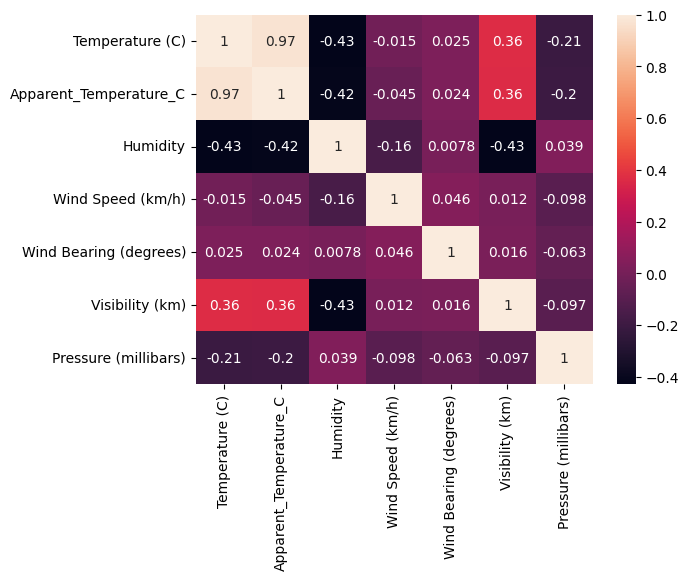

In [47]:
sns.heatmap(kendallcorr, xticklabels=kendallcorr.columns, yticklabels=kendallcorr.columns, annot=True)

## **Chi-Squared Test**

In [48]:
from scipy.stats import chi2_contingency
contingency= pd.crosstab(df['Precip_Type'], df['Temperature (C)'])
c, p, dof, expected = chi2_contingency(contingency)
print(p)

0.0


In [49]:
from scipy.stats import chi2_contingency
contingency= pd.crosstab(df['Precip_Type'], df['Humidity'])
c, p, dof, expected = chi2_contingency(contingency)
print(p)

1.0458977042487906e-117


In [50]:
from scipy.stats import chi2_contingency
contingency= pd.crosstab(df['Summary'], df['Humidity'])
c, p, dof, expected = chi2_contingency(contingency)
print(p)

0.0


In [51]:
from scipy.stats import chi2_contingency
contingency= pd.crosstab(df['Wind Speed (km/h)'], df['Temperature (C)'])
c, p, dof, expected = chi2_contingency(contingency)
print(p, c)

0.9999599037601423 6596107.750865319


# **EXPERIMENT-05**

Splitting data for training and testing

In [52]:
x = df[['Visibility (km)', 'Humidity', 'Apparent_Temperature_C']]
y = df[['Temperature (C)']]

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [54]:
x_train.shape

(8202, 3)

In [55]:
x_test.shape

(2051, 3)

Model Development

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [57]:
print(model.coef_)
print(model.intercept_)

[[ 0.00363305 -2.34259723  0.85237425]]
[4.44685973]


Model Prediction

In [58]:
y_pred = model.predict(x_test)

Converting into 1-D array

In [59]:
Y_pred = y_pred.ravel()
Y_pred.shape

(2051,)

In [60]:
Y_test = y_test['Temperature (C)'].values
Y_test

array([11.06111111, 17.03333333, -0.25      , ...,  0.02222222,
       15.76666667,  7.17222222])

In [61]:
Y_test = Y_test.ravel()
Y_test.shape

(2051,)

In [62]:
df1 = pd.DataFrame(Y_test, Y_pred)
df1 = pd.DataFrame({"Actual Temperature":Y_test, "Predicted Temperature":Y_pred})
print(df1)

      Actual Temperature  Predicted Temperature
0              11.061111              12.030527
1              17.033333              17.334122
2              -0.250000              -0.706604
3               6.155556               5.697813
4               2.916667               1.992708
...                  ...                    ...
2046            9.838889               8.395061
2047           19.938889              19.389076
2048            0.022222               2.123789
2049           15.766667              16.374912
2050            7.172222               8.885247

[2051 rows x 2 columns]


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
model.score(x_test, Y_test)*100

98.95707003587394

In [65]:
trial = np.array([[0.9,15, 9]])
print("Predicted: {}".format(model.predict(trial)))

Predicted: [[-23.01746073]]


c:\Users\Preeti Khamkar\Python__\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Logistic Regression

In [ ]:
df.columns

Index(['Formatted_Date', 'Summary', 'Precip_Type', 'Temperature (C)',
       'Apparent_Temperature_C', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [ ]:
data = df[['Precip_Type', 'Humidity', 'Temperature (C)']]

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter ={'penalty' : ['l2','elasticnet'] , 'C': [1,2,3,4,5,6,10,20,30,40,50] , 'max_iter': [100,200,300,]}

In [ ]:
reg_model = GridSearchCV(reg , param_grid = parameter , scoring = 'accuracy' , cv= 5 , error_score='raise')
reg_model.fit(x_train , y_train)

c:\Users\Preeti Khamkar\Python__\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.